# FAANG Stock Data Analysis and Automation: Solutions to Computer Infrastructure Assessment Problems

This notebook documents the process of building a small automated data pipeline for retrieving and visualising financial market data from selected FAANG companies using Python. Financial datasets are widely used for trend analysis, forecasting, and algorithmic decision-making, making automated workflows a valuable skill in both academic and industry settings.

The project is divided into four main components:
1. Retrieving historical stock data using the `yfinance` package.This involves implementing a reusable function, ```get_data()```, that downloads data for specified tickers over a specified date range and saves the results to a CSV file.
2. Visualizing the closing prices. This involves creating a function, ```plot_data()``` that reads the newest data file and generates labelled, easy-to-interpret plots of the price trends.
3. Transforming the code into a standalone executable script. This involves adding a shebang line and enabling command-line execution for improved portability.
4. Automating execution with GitHub Actions. This involves creating a workflow file to schedule the script to run automatically at defined intervals, demonstrating how cloud-based automation can maintain up-to-date results without manual intervention.

This notebook demonstrates how Python functions can be combined into a complete data pipeline, detailing each step—from downloading data with ```get_data()```, to generating plots with `plot_data()`, converting the functions into an executable script, and ultimately automating the workflow in the cloud.

Firslt, I import all necessary packages that will be used throughout the notebook. The requirements.txt file contained in the root of my repository lists all required packages for easy installation.

In [1]:
# pandas is a powerful data analysis and manipulation library for Python.
import pandas as pd
# yfinance is set of tools to download market data from Yahoo Finance.
import yfinance as yf
# datetime module supplies classes for manipulating dates and times.
import datetime as dt
# os module provides a way of using operating system dependent functionality.
import os
# matplotlib is a comprehensive library for creating visualizations in Python.
import matplotlib.pyplot as plt
# seaborn is a Python data visualization library based on matplotlib
import seaborn as sns

## Problem 1: Data retrieval with yfinance

In this section, I implement the function `get_data()`, which downloads the last five days of hourly FAANG stock data using the yfinance library. The function must save the retrieved data as a CSV file in a `data/` folder, using a timestamped filename in the format YYYYMMDD-HHmmss.csv. The folder should be created if it does not already exist.

The function `get_data()` takes the following parameters:
- `tickers`: A list of stock ticker symbols (e.g., ['AAPL', 'GOOG']).
- `start`: The start date for the data retrieval (default to 5 days ago from the current date).
- `end`: The end date for the data retrieval (default to the current date).
- `interval`: The data interval (default to '1h' for hourly data).



To retrieve historical stock data I'll use the [y-finance package](https://ranaroussi.github.io/yfinance/) which is a popular library for accessing financial data from [Yahoo Finance](https://finance.yahoo.com/). The package provides a simple and efficient way to download historical market data. It supports various intervals (e.g., daily, hourly) and allows users to specify date ranges for data retrieval. Y-finance offers several advantages, such as easy access to a wide range of financial data, support for multiple tickers, and the ability to download data in a structured format (e.g., pandas DataFrame), but has also some [limitations](https://medium.com/@trading.dude/why-yfinance-keeps-getting-blocked-and-what-to-use-instead-92d84bb2cc01), such as abrupt blocking of requests by Yahoo Finance and rate limits. Therefore, there are [alternative packages available](https://wire.insiderfinance.io/stop-wasting-time-the-yfinance-alternative-that-actually-delivers-4f6280a88525), for a more robust and reliable data retrieval. Y-finance is suitable for this project due to its simplicity and ease of use for downloading historical stock data.

To handle date and time operations, I'll use the built-in [datetime package](https://docs.python.org/3/library/datetime.html) in Python which provides classes for manipulating dates and times in both simple and complex ways. It allows for easy arithmetic operations on dates, formatting and parsing of date strings, and handling of time zones. In this project, I use the datetime package to calculate the start and end dates for data retrieval, ensuring that the function can dynamically adjust the date range based on the current date. It is important to note that the datetime objects created in this project are timezone-naive, meaning they do not contain any timezone information. The default behavior of the datetime module is to create timezone-naive objects unless explicitly specified otherwise.
The [datetime.now() function](https://www.freecodecamp.org/news/python-datetime-now-how-to-get-todays-date-and-time/) uses the machine’s local timezone and returns the current local date and time as a naive datetime object. Similarly, when calculating the start date by subtracting a timedelta from the current date, the resulting datetime object remains naive, as it is derived from the naive current date. To subtract 5 days from the current date, I use the [timedelta](https://www.geeksforgeeks.org/python/python-datetime-timedelta-function/) class from the datetime module. The timedelta class represents a duration, which can be used to perform arithmetic operations on datetime objects. In this case, I create a timedelta object representing 5 days and subtract it from the current date to obtain the start date for data retrieval.

In [2]:
def get_data(tickers, start = dt.datetime.now() - dt.timedelta(days=5), end = dt.datetime.now(), interval = "1h"):
        """
    Download historical market data for the given tickers and save to CSV.
    The CSV file is saved in the 'data' folder with a timestamped filename.

    :param tickers: List containing one or more ticker symbols supported by yfinance.
    :param start: Start datetime for the historical data. Defaults to 5 days ago.
    :param end: End datetime for the historical data. Defaults to now.
    :param interval: Data sampling interval (e.g. '1m', '1h', '1d'). Defaults to '1h'.
    :return: None.
    """
    # Retrieve historical stock data using yfinance
    data = yf.download(tickers, start=start, end=end, interval=interval, auto_adjust=True)
    # Get current timestamp for filename
    now= dt.datetime.now().strftime("%Y%m%d-%H%M%S")
    # Print first few rows of data
    print(data.head())
    # Save data to CSV file in data folder
    data.to_csv("data/" + now + ".csv", sep = ",")


"FAANG" is an acronym that refers to [five high-performing technology stocks](https://www.businessinsider.com/personal-finance/investing/what-is-faang) in the market: Meta (formerly Facebook), Apple, Amazon, Netflix, and Alphabet (formerly Google). These companies are known for their significant influence on the technology sector and the stock market as a whole. 

The function ```get_data()``` can be used to get data for the five FAANG stocks with the following tickers:
- META (Meta, formerly Facebook)
- AAPL (Apple)
- AMZN (Amazon)
- NFLX (Netflix)
- GOOG (Alphabet, formerly Google)

In [3]:
# Call function get_data() with FAANG tickers. I choose default start, end, interval parameters.
get_data(['META', 'AAPL', 'AMZN', 'NFLX' , 'GOOG'])

[*********************100%***********************]  5 of 5 completed

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-15 14:30:00+00:00  274.144989  223.029999  307.730011  641.054993   
2025-12-15 15:30:00+00:00  275.510010  224.389999  308.829987  650.545105   
2025-12-15 16:30:00+00:00  274.920013  222.544998  306.142609  650.309998   
2025-12-15 17:30:00+00:00  274.040009  222.375000  307.450012  650.219971   
2025-12-15 18:30:00+00:00  273.369995  223.222595  308.540009  651.219971   

Price                                       High                          \
Ticker                          NFLX        AAPL        AMZN        GOOG   
Datetime                                                                   
2025-12-15 14:30:00+00:00  94.004997  280.049988  227.500000  311.359985   
2025-12-15 15:30:00+00:00  94.430000  275.640411  224.389999  309.390015   
202

The `get_data()` function successfully retrieves the last five days of hourly (intraday) stock data for the FAANG companies and saves it to the `data/` folder using a timestamped filename. Intraday data provides price movements at finer intervals (hourly in this case) capturing short-term volatility, pullbacks, and market noise. This contrasts with daily (End-of-Day) data, which aggregates an entire trading day into a single set of Open, High, Low, Close values and is more commonly used for long-term trend analysis.

Stock data can be provided in [several forms](https://www.finfeedapi.com/blog/stock-market-data-realtime-intraday-historical) (e.g., intraday, daily, real-time, historical), each serving different analytical purposes. Intraday data is particularly valuable for understanding short-term behaviour, while daily data provides a clearer picture of broader market trends.

The retrieved dataset includes key variables such as Open, High, Low, Close prices and Volume for each ticker at hourly intervals. The first column of the output (the DataFrame index) stores the corresponding timestamps, making it easy to analyse price movements throughout each trading day. To verify the retrieval process, the function prints the first few rows of the dataset, giving a quick preview of the hourly price and volume information downloaded for the FAANG stocks.

## Problem 2: Data visualisation

This section focuses on the `plot_data()` function, which identifies the latest CSV file in the `data/` folder, loads it into a pandas DataFrame, and plots the Close prices for all FAANG stocks. The plot must include axis labels, a legend, and a title based on the most recent date in the dataset. The generated figure should be saved in a ```plots/``` folder using a timestamped filename YYYYMMDD-HHmmss.png.

To list the files saved in the data folder I'll use the built-in [os package](https://docs.python.org/3/library/os.html) in Python which provides a way of using operating system dependent functionality like reading or writing to the file system. The os allows Python code to work with directories, file paths, environment variables, and low-level OS functionality in a cross-platform way (Windows, macOS, Linux).
```os.listdir()``` returns all files and folders inside a given directory as a list of strings. It is lightweight, fast, and works across all operating systems. In this project, I use ```os.listdir("data/")``` to retrieve all previously downloaded CSV files. In this case, it lists all files in the `data/` folder located in the root of my repository, which contains the historical stock data files downloaded using the ```get_data``` function. All files contained in the `data/` folder are CSV files, therefore I will not need to filter the list further.

The downloaded CSV files are named using timestamps (YYYYMMDD-HHmmss.csv). Sorting the filenames allows the script to identify the most recent file and ensure that the newest dataset is used for plotting. To sort the files by modification time I'll use Python [sort built-in function](https://docs.python.org/3/howto/sorting.html). Files are sorted in reverse order, which ensures that the most recent file (based on timestamp) appears first in the list, which makes selecting it as list_of_files[0] straightforward. The latest file is then imported into a pandas DataFrame using the [pandas read_csv function](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).
The first column of the CSV file contains date information in the YYYYMMDD-HHmmss format and is the index of the DataFrame. To ensure that pandas interprets the index as datetime objects I convert the index to a datetime object with the [pandas to_datetime function](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html).The timezone information is not included in the CSV file, so the datetime objects will be timezone-naive. If the input timestamp includes a timezone (e.g., "2024-05-10 12:00 UTC"), pandas keeps it, otherwise pandas creates a timezone-naive datetime. The utc parameter is set to False by default, so no conversion to UTC timezone is performed.

To create the plot with close prices of each stock I'll use [matplotlib.pyplot](https://matplotlib.org/stable/) and [seaborn](https://seaborn.pydata.org/index.html).

[Matplotlib](https://matplotlib.org/stable/plot_types/index) is one of the core plotting libraries in the Python scientific ecosystem. It gives full control over every visual aspect of a figure, making it ideal for building custom charts. It provides fine-grained control over figures, axes, labels, colours, and styles.

[Seaborn](https://seaborn.pydata.org/examples/index.html) is a high-level statistical visualization library built on top of Matplotlib. It is designed to simplify complex plots and provide aesthetically pleasing defaults. Seaborn comes with several built-in themes and [color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html) to enhance the visual appeal of plots. In this project, Seaborn was used to apply a consistent visual theme with the [set_theme() function](https://seaborn.pydata.org/generated/seaborn.set_theme.html) and enhance the aesthetic quality of the line plots. Although the actual time-series lines were plotted with Matplotlib, the styling from Seaborn provided a cleaner appearance.

The generated plot is saved in the `plots/` folder using a timestamped filename (YYYYMMDD-HHmmss.png) to ensure uniqueness and easy identification of when the plot was created.


In [4]:
# Define function plot_data()
def plot_data():
    """
    Load the latest CSV file from the 'data' folder, plot the Close prices for each stock.
    Save the plot to the 'plots' folder with a timestamped filename.
    :return: None
    """
    # Retrieve all csv files in data folder
    list_of_files =os.listdir("data/")
    # Sort files by modification time, newest first
    list_of_files.sort(reverse = True)
    # Get the latest file
    latest_file = list_of_files[0]
    # Import latest file into pandas DataFrame
    df = pd.read_csv(f'data/{latest_file}', header=[0,1], index_col=0, parse_dates=True)
    # Convert index to datetime
    df.index = pd.to_datetime(df.index)

    # Use a modern seaborn theme
    sns.set_theme(style="whitegrid", context="talk", palette="Set1") #set seaborn theme and color palette

    # Create the plot
    # Set figure size
    plt.figure(figsize=(14, 7))

    # Plot Close prices for each stock
    for ticker in df['Close'].columns:
        plt.plot(df['Close'][ticker], label=ticker)
    # Customize x-axis and rotate labels for better readability
    plt.xticks(rotation=45, fontsize=12)

    # Labels and title
    plt.xlabel('Date', fontsize=14, fontweight='bold')
    plt.ylabel('Close Price (USD)', fontsize=14, fontweight='bold')
    # Title with latest date in data
    plt.title(df.index.max().strftime('%Y-%m-%d'), fontsize=22, pad=20, fontweight='bold')

    # Legend outside plot
    plt.legend(title="Tickers", loc="center left", bbox_to_anchor=(1, 0.5), frameon=True)

    # Improve layout so the legend doesn't get cut off
    plt.tight_layout()

    #save plot to plots folder
    now= dt.datetime.now().strftime("%Y%m%d-%H%M%S")
    plt.savefig("plots/" + now + ".png")
    # Show plot
    plt.show()

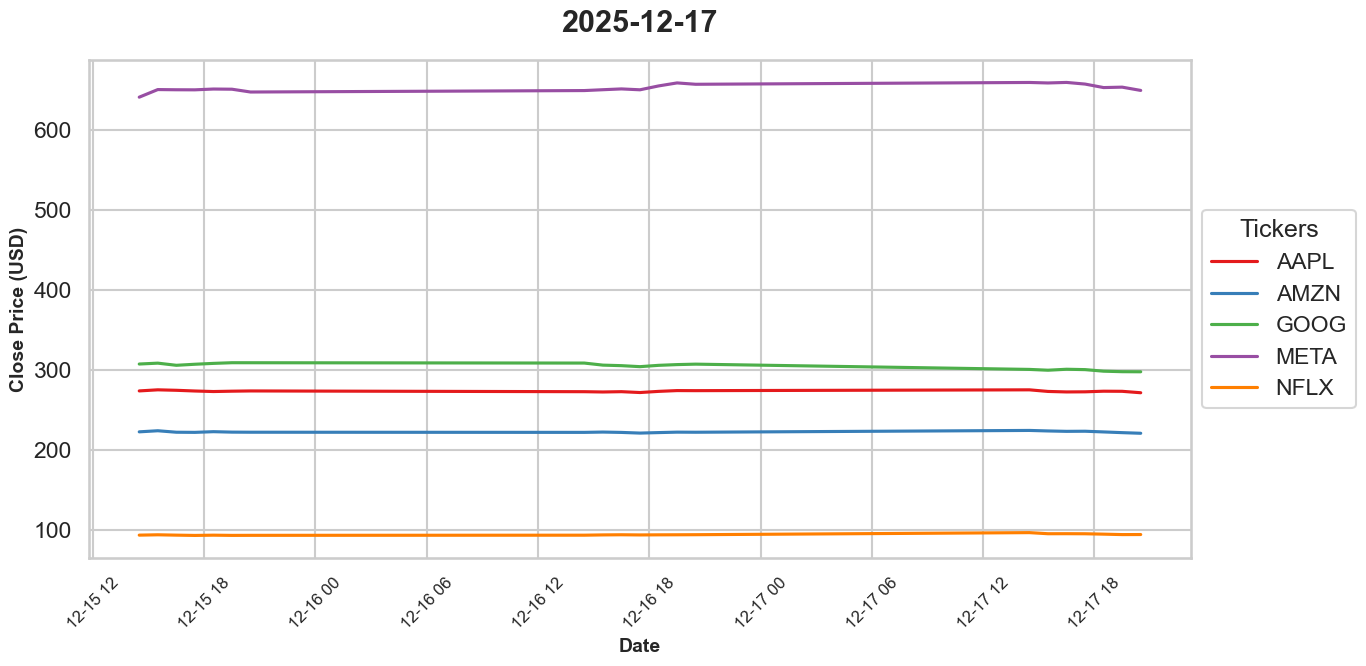

In [5]:
# Call function plot_data()
plot_data()

The resulting plot displays the Close prices of the five FAANG stocks over the specified date range. The plot includes labelled axes, a legend for all five tickers, and a title that reflects the most recent date in the dataset. The figure is saved in the `plots/` folder using a timestamped filename (YYYYMMDD-HHmmss.png), allowing each plot to be archived automatically without overwriting previous results. This provides a useful historical visual record of the stock movements downloaded by the script.

## Problem 3: Executable script

The goal of this section is to convert the notebook code into a standalone Python script called `faang.py`. The script must contain both `get_data()` and `plot_data()` functions, include a shebang line, and be made executable so it can run from the terminal using `./faang.py`.

To achieve this I created a standalone script `faang.py` containing the two functions `get_data()` and `plot_data()`, along with the necessary imports. The script is designed to be executed directly from the terminal, which makes the project more reusable. When run, the script first calls the `get_data()` function to download the latest stock data for the FAANG companies and save it to a CSV file in the ```data/``` folder. Then, it calls the `plot_data()` function to read the latest data file, generate a plot of the Close prices for each stock, and save the plot as a PNG file in the ```plots/``` folder.

To enable direct execution from the terminal, a [Shebang line](https://realpython.com/python-shebang/) (outlined below) is added at the top of the script, specifying the path to the Python interpreter. This line tells the operating system which interpreter should execute the file. The Shebang line locates the correct Python interpreter dynamically through the user’s environment instead of hardcoding a path, and improves portability across different systems.



```python
#!/usr/bin/env python3
```

Additionally, the script file should be marked as [executable](http://realpython.com/run-python-scripts/). This has been achieved using the `chmod` command in the terminal (outlined below). `chmod` changes file permissions and `+x` adds execute permission for the user.


```bash
chmod u+x faang.py
```

This setup allows users to run the script simply by typing

``` bash
./faang.py
```
in the terminal instead of `python faang.py`, streamlining the execution process.

The script was saved in the root of my repository. This is important because scripts must reside in a directory where the user has execute permissions and where the shell can access them. This also ensures that both the `data/` and `plots/` folders can be accessed consistently without needing complex file paths.


## Problem 4: Automation with GitHub Actions

In this section, I create a GitHub Actions workflow file (`.github/workflows/faang.yml`) that automatically runs the `faang.py` script every Saturday morning.

[Automation](https://www.ibm.com/think/topics/workflow-automation) is a critical component of modern data workflows because it ensures consistency, reliability, and efficiency. While there are many ways to [automate workflows](https://thedigitalprojectmanager.com/tools/best-workflow-automation-software/), cloud-based solutions like [GitHub Actions](https://docs.github.com/en/actions) offer several advantages over traditional local methods such as [cron jobs](https://www.geeksforgeeks.org/linux-unix/how-to-setup-cron-jobs-in-ubuntu/). GitHub Actions provides a platform-independent environment that runs in the cloud, eliminating the need for local infrastructure. This means workflows can be executed regardless of the user's operating system or hardware setup. Additionally, GitHub Actions integrates seamlessly with version control and offers scalability of resources.

A [GitHub workflow](https://docs.github.com/en/actions/how-tos/write-workflows) is an automated process that runs one or more jobs in response to events in a repository. It’s common practice and highly encouraged to use existing [GitHub Actions](https://docs.github.com/en/actions/get-started/quickstart) in ones workflow files. This practice saves time and effort by leveraging pre-built functionalities. Available actions can be found in the [GitHub Marketplace](https://github.com/marketplace). GitHub has official actions for common tasks, such as [Checkout repository action](https://github.com/marketplace/actions/checkout) and [Set Up Python action](https://github.com/marketplace/actions/setup-python). Many community-contributed actions are also available.

The workflow file is written in [YAML syntax](https://yaml.org/spec/1.2.2/) and consists of the following key components:
- `name`: This specifies the name of the workflow. In this case, it's "FAANG Data Fetch and Plot".
- `on`: This section defines the events that trigger the workflow. Here, the workflow is set to run on a schedule using [cron syntax](https://docs.gitlab.com/topics/cron/). The expression `0 9 * * 6` means the workflow will
run at 9:00 AM (UTC) every Saturday. By including `workflow_dispatch` in the `on` section of the workflow file, users can manually trigger the workflow from the GitHub Actions tab in their repository.
- `jobs`: This section contains the [jobs](https://realpython.com/github-actions-python/#workflow-jobs) that will be executed as part of the workflow.
  - `run-faang-script`: This is the identifier for the job.
    - `runs-on`: This specifies the type of virtual machine to run the job on. Here, it's set to `ubuntu-latest`, which means the job will run on the latest version of [Ubuntu](https://ubuntu.com/desktop).
    - `steps`: This section lists the individual steps that make up the job.
      - `name: Checkout repository`: This step uses the `actions/checkout@v4` [action](https://github.com/actions/checkout) to check out the repository's code into the current GitHub workspace so that it can be accessed by subsequent steps.
      - `name: Set up Python`: This step uses the `actions/setup-python@v5` [action](https://github.com/actions/setup-python) to set up a specific version of Python (3.10 in this case) on the runner.
      - `name: Install dependencies`: This step runs a command to install any necessary dependencies using [pip](https://packaging.python.org/en/latest/key_projects/#pip). Here, it installs the `yfinance` package and any other dependencies specified in the `requirements.txt` file.
      - `name: Run FAANG script`: This step runs the `faang.py` script using Python.
        - `name: Commit and push results`: This step uses the `stefanzweifel/git-auto-commit-action@v7` [action](https://github.com/stefanzweifel/git-auto-commit-action) to automatically commit and push any changes made to the data and plots folders back to the repository. The `commit_message` parameter specifies the message to use for the commit, and the `file_pattern` parameter specifies which files to include in the commit (in this case, all CSV files in the ```data/``` folder and all PNG files in the ```plots/``` folder).

Each run provides detailed logs and status information for each step in the workflow, allowing users to monitor the execution and troubleshoot any issues that may arise.
The data and plots generated by the script will be saved in the respective `data` and `plots` folders in the root of the repository. These files can be accessed directly from the repository or downloaded for further analysis.


The YAML workflow file, `faang.yml`, is stored and defined in a `.github/workflows/` folder in project’s root directory. The workflow is triggered every Saturday at 9:00 AM UTC.
The following is the content of the `faang.yml` file:
```yaml

name: FAANG Data Fetch and Plot
on:
  schedule:
    - cron: '0 9 * * 6'  # Runs every Saturday at 9:00 AM UTC
  workflow_dispatch:      # can be run manually as well
jobs:
  run-faang-script:
    runs-on: ubuntu-latest
    steps:
      - name: Checkout repository
        uses: actions/checkout@v4

      - name: Set up Python
        uses: actions/setup-python@v5
        with:
          python-version: '3.10' # specify python version

      - name: Install dependencies
        run: pip install -r requirements.txt # pip install ensures all packages from requirements.txt file are installed (including yfinance)

      - name: Run FAANG script
        run: python faang.py

      -  name: Commit and push results
         uses: stefanzweifel/git-auto-commit-action@v7
         with:
          commit_message: "Update FAANG data and plots [automated]"
          file_pattern: 'data/*.csv plots/*.png'

```



This automation ensures the pipeline runs reliably and consistently without manual intervention. It also demonstrates how cloud-based tools like GitHub Actions can replicate scheduled tasks traditionally handled by local cron jobs, but in a more accessible, platform-independent way.


Through this assignment, I implemented a complete end-to-end workflow for acquiring, processing, and visualising financial stock data using Python. The project involved creating functions to download data using yfinance, plot the data, convert the code into an executable script, and automate its execution using GitHub Actions.

This project also serves as a practical example of how automated data workflows can be applied to many real-world tasks, such as retrieving different datasets on a schedule, performing automated data cleaning, updating dashboards, running web scrapers, retraining machine learning models, or monitoring APIs and services. These types of automated processes are valuable because they handle repetitive tasks reliably, reduce manual effort, and ensure timely and consistent results.

## End